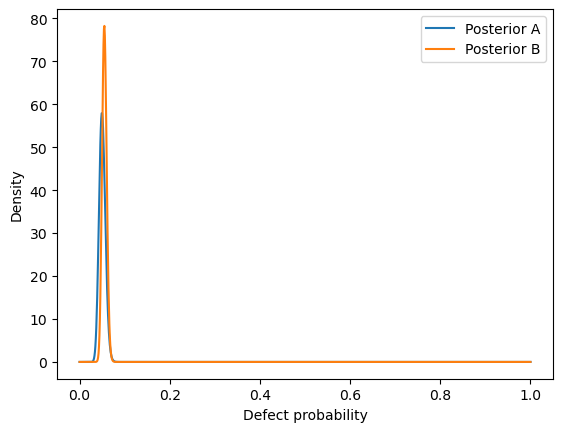

Expected true cost of packaging A: 52.45 (39.77, 66.83)
Expected true cost of packaging B: 56.22 (46.65, 66.64)


In [44]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp


# 90% of the time went into reading the data properly.
data = pd.read_csv("ab_test_data.csv", index_col=0, skip_blank_lines=True, skipinitialspace=True)


a_test = data["A test"]
number_of_samples_A = a_test.iloc[0]
number_or_defects_A = a_test.iloc[1]
packaging_cost_A = a_test.iloc[2]
defect_cost_A = a_test.iloc[3]

b_test = data["B test"]
number_of_samples_B = b_test.iloc[0]
number_or_defects_B = b_test.iloc[1]
packaging_cost_B = b_test.iloc[2]
defect_cost_B = b_test.iloc[3]

# Parameters of the prior beta distribution for both A and B tests.
# With this parameters, we have a non-informative prior. In any case,
# the prior is overwhelmed by the data, so this choice is not very important.
alpha = 0.5
beta = 0.5

# Parameters of the posterior beta distribution for A test.
alpha_post_A = alpha + number_or_defects_A
beta_post_A = beta + number_of_samples_A - number_or_defects_A
beta_rv_A = sp.stats.beta(alpha_post_A, beta_post_A)

# Parameters of the posterior beta distribution for B test.
alpha_post_B = alpha + number_or_defects_B
beta_post_B = beta + number_of_samples_B - number_or_defects_B
beta_rv_B = sp.stats.beta(alpha_post_B, beta_post_B)

p = np.linspace(0, 1, 1000)

# Plot the prior and posterior beta distributions for A test.
fig, ax = plt.subplots(1, 1)
ax.plot(p, beta_rv_A.pdf(p), label='Posterior A')
ax.plot(p, beta_rv_B.pdf(p), label='Posterior B')
ax.set_xlabel("Defect probability")
ax.set_ylabel("Density")
ax.legend()
plt.show()

# Expected cost of using packaging A.
# E[total_cost_A] = cost_A + E[cost_defect | A]
# E[total_cost_A] = cost_A + int p * cost_defect * beta(p | alpha_post_A, beta_post_A) dp
# E[total_cost_A] = cost_A + cost_defect * E[p | alpha_post_A, beta_post_A]
E_total_cost_A = packaging_cost_A + defect_cost_A * beta_rv_A.expect()

# Credible interval for the posterior distribution of A test.
E_total_cost_A_low, E_total_cost_A_high = \
    packaging_cost_A + defect_cost_A * np.array(beta_rv_A.interval(0.95))

# Results
formatted_A = "{:.2f}".format(E_total_cost_A) + \
    " (" + "{:.2f}".format(E_total_cost_A_low) + ", " + \
    "{:.2f}".format(E_total_cost_A_high) + ")"
print("Expected true cost of packaging A:", formatted_A)

# Expected cost of using packaging B.
E_total_cost_B = packaging_cost_B + defect_cost_B * beta_rv_B.expect()

# Credible interval for the posterior distribution of B test.
E_total_cost_B_low, E_total_cost_B_high = \
    packaging_cost_B + defect_cost_B * np.array(beta_rv_B.interval(0.95))

# Results
formatted_B = "{:.2f}".format(E_total_cost_B) + \
    " (" + "{:.2f}".format(E_total_cost_B_low) + ", " + \
    "{:.2f}".format(E_total_cost_B_high) + ")"
print("Expected true cost of packaging B:", formatted_B)

In [45]:
E_total_cost_A_credible_interval

(np.float64(0.03777013225427479), np.float64(0.06482845573314779))